# Section 1. Introduction to the Problem/Task and Interpreter System

An interpreter system is a type of program that directly executes instructions written in a specific language without requiring them to be compiled into machine code first. Unlike compilers, which translate entire programs before execution, interpreters process commands line by line or statement by statement, providing immediate feedback and dynamic interaction between the user and the system. Interpreter systems are widely used in various domains such as programming languages (e.g., Python, JavaScript), command-line interfaces, and rule-based engines. Their importance lies in their flexibility, real-time execution, and ease of debugging and testing, making them valuable tools for both development and interactive applications.

For this project, our group chose to design a Command Interpreter System that serves as the core mechanic of a text-based poker game with RPG elements. This interpreter system processes user commands such as Start, Bet, Raise, Call, Fold, Buy, and Quit, interpreting them as gameplay actions that affect the player’s progress and strategy. Each command input triggers corresponding game functions—such as initiating a poker round, placing bets, purchasing upgrades, or exiting the game—making the interpreter the bridge between user input and in-game outcomes.

The chosen interpreter system was selected because of its strong potential for interactive gameplay and real-time decision-making. By using a command interpreter, players engage directly through text-based commands, providing a classic, console-like experience reminiscent of early adventure and strategy games. This design not only emphasizes logic and strategy but also demonstrates the practical application of interpreter systems in game development, where parsing, validating, and executing structured inputs are essential.

The target task of this interpreter is to execute and manage gameplay commands entered by the user. It interprets textual input, validates parameters, and translates them into corresponding actions within the game—such as starting a match, betting chips, or purchasing upgrades between stages. Through this, the interpreter ensures a smooth command-driven experience, enabling players to progress through increasingly challenging poker battles while managing resources and strategies via intuitive text-based interactions.

In summary, our command interpreter system transforms a sequence of user inputs into dynamic gameplay events, illustrating how interpreters can serve as the foundation for interactive, logic-based games. This approach highlights both the technical functionality and creative application of interpreters in an engaging, game-oriented environment.

# Section 2. Description of the Input Language

# Section 3. System Design

# Section 4. Data Preprocessing and Cleaning

# Section 5. Implementation Details

In [3]:
from  tokenizer import lexer


data = "use 4h to change suit of 10d to s"
lexer.input(data)

for tok in lexer:
    print(tok)



LexToken(COMMAND,'use',1,0)
LexToken(CARD_ID,'4h',1,4)
LexToken(TO,'to',1,7)
LexToken(ACTION,'change',1,10)
LexToken(CHANGE_KEY,'suit',1,17)
LexToken(OF,'of',1,22)
LexToken(CARD_ID,'10d',1,25)
LexToken(TO,'to',1,29)
LexToken(SUIT,'s',1,32)


# Section 6. Testing with Valid and Invalid Inputs

In [1]:
from interpreter.tokenizer import lexer

In [2]:
lexer.input('use')
for tok in lexer:
    print(tok)

LexToken(COMMAND,'use',1,0)


In [3]:
from interpreter.parser import parser

In [50]:
out = parser.parse('use 5h to exchange 5h with 1')
print(out)

Dog
Command(command='use', target=SpecialCardCommand(special_card=CardID(value='5h'), action=Action(action='exchange', target=ExchangeTarget(target1=CardID(value='5h'), target2=Number(num=1)))))


In [54]:
from graphviz import Digraph
import interpreter.parser as p

def create_ast(out):

    dot = Digraph('Abstract Syntax Tree') 
    
    nodes = []
    edges = []
    
    nodes.append(out.command)
    
    if out.target:
        t = out.target
        if type(t) == list:
            for i, card in enumerate(t):
                nodes.append(card.value + str(i))
                edges.append((out.command, card.value + str(i)))
        if type(t) == p.Number:
            nodes.append(str(t.num))
            edges.append((out.command, str(t.num)))
        if type(t) == p.CardID:
            nodes.append(str(t.value))
            edges.append((out.command, str(t.value)))
        if type(t) == p.ItemID:
            nodes.append(str(t.item))
            edges.append((out.command, str(t.item)))
        if type(t) == p.SpecialCardCommand:
            a = t.action.action + "\n" + t.special_card.value
            nodes.append(a)
            edges.append((out.command, a))
            at = t.action.target
            if at:
                if type(at) == p.ChangeTarget:
                    nodes.append("change_key\n " + at.change_key)
                    edges.append((a, "change_key\n " + at.change_key))
                    nodes.append("card\n " + at.card_id)
                    edges.append((a, "card\n " + at.card_id))
                    if type(at.change_value) == p.Number:
                        nodes.append("change_value\n " + str(at.change_value.num))
                        edges.append((a, "change_value\n " + str(at.change_value.num)))
                    if type(at.change_value) == p.AlphabetValue or type(at.change_value) == p.Suit:
                        nodes.append("change_value\n " + str(at.change_value.value))
                        edges.append((a, "change_value\n " + str(at.change_value.value)))
    
                if type(at) == p.ExchangeTarget:
                    def target_value(target):
                        if type(target) == p.Number:
                            return str(target.num)
                        if type(target) == p.CardID:
                            return target.value
                    nodes.append("target 1\n " + target_value(at.target1))
                    edges.append((a, "target 1\n " + target_value(at.target1)))
                    nodes.append("target 2\n " + target_value(at.target2))
                    edges.append((a, "target 2\n " + target_value(at.target2)))
                    
                
    
    for node in nodes:
        dot.node(node, node)
    
    for src, dst in edges:
        dot.edge(src, dst)
    
    return dot

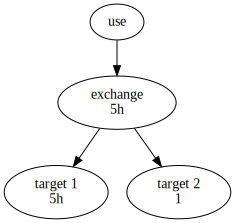

In [55]:
create_ast(out)

Dog


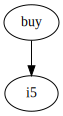

In [57]:
out = parser.parse('buy i5')
create_ast(out)

# Section 7. Extensions and Additional Features

# Section 8. Insights and Conclusions

# Section 9. References